# Reading,Understanding and Visualising the data

In [593]:
##Importing the libraries

import numpy as np     # For numerical computing in python
import pandas as pd    # For data manipulation in python
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns   # For making statistical graphics in Python and work in sync with matplotlib

import sklearn  # Machine learning library in python
from sklearn.model_selection import train_test_split # For train_test split of the data 
from sklearn.preprocessing import MinMaxScaler # For scaling the data

from sklearn.feature_selection import RFE # For Recursive Feature Elimination
from sklearn.linear_model import LinearRegression 

import statsmodels.api as sm # To conduct statistical tests
from statsmodels.stats.outliers_influence import variance_inflation_factor # To calculate VIF Value


from sklearn.metrics import r2_score # To calculate r2 score

In [594]:
import warnings
warnings.filterwarnings("ignore") # To remove package deprecation warning

In [595]:
##Read the data

df=pd.read_csv("day.csv")

In [596]:
##To view 

df.head() # By default, head() gives first 5 rows of the data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [597]:
##To check the size of the data

df.shape

(730, 16)

In [527]:
##To view all the columns in the data

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [528]:
## To check info about each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [529]:
##Checking missing values

df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Observation: There is no missing values present in the dataset and majority of the data having numerical values except date column.


In [530]:
## Check for duplicate entries

df.duplicated().sum()

0

#### There is no duplicate entries found in the dataset

In [531]:
##Summary statistics for numerical variable

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Univariate Analysis

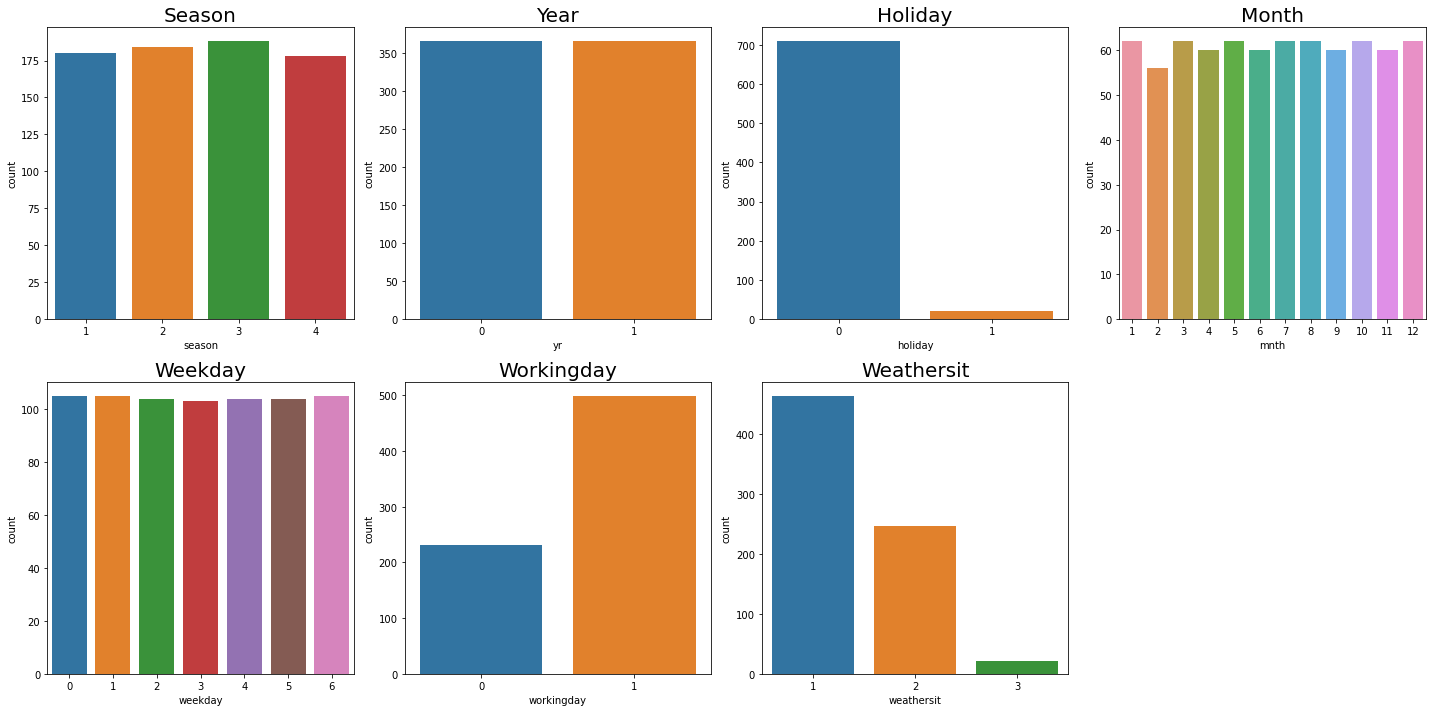

In [532]:
#For categorical variables , we use countplot to visualize.

plt.figure(figsize=(20,10)) # The figure size

plt.subplot(2,4,1)
sns.countplot(x="season",data=df)
plt.title("Season",fontsize=20) # The title of the plot

plt.subplot(2,4,2)
sns.countplot(x="yr",data=df)
plt.title("Year",fontsize=20) # The title of the plot

plt.subplot(2,4,3)
sns.countplot(x="holiday",data=df)
plt.title("Holiday",fontsize=20) # The title of the plot

plt.subplot(2,4,4)
sns.countplot(x="mnth",data=df)
plt.title("Month",fontsize=20) # The title of the plot

plt.subplot(2,4,5)
sns.countplot(x="weekday",data=df)
plt.title("Weekday",fontsize=20) # The title of the plot

plt.subplot(2,4,6)
sns.countplot(x="workingday",data=df)
plt.title("Workingday",fontsize=20) # The title of the plot

plt.subplot(2,4,7)
sns.countplot(x="weathersit",data=df)
plt.title("Weathersit",fontsize=20)

plt.tight_layout() # To avoid overlapping layout
plt.show() # To display the plot

### Observations:

        1.SEASON - All the 4 season have equally distributed data. 
        2.Yr - Equal distribution of data for both the years 2018(0) and 2019(1).
        3.HOLIDAY - Number of holidays(1) are less compared to non-holidays(0).
        4.MONTH - Data is almost equally distributed across the months.
        5.WEEKDAY - Weekdays tend to have equally distributed data.
        6.WORKINGDAY - Data of workingday(1) is high when compared to the data of weekend/holiday(0).
        7.WEATHERSIT - Most of the days has a Clear wheather(1) whereas there is no data available for the bad weather(4).
       
        

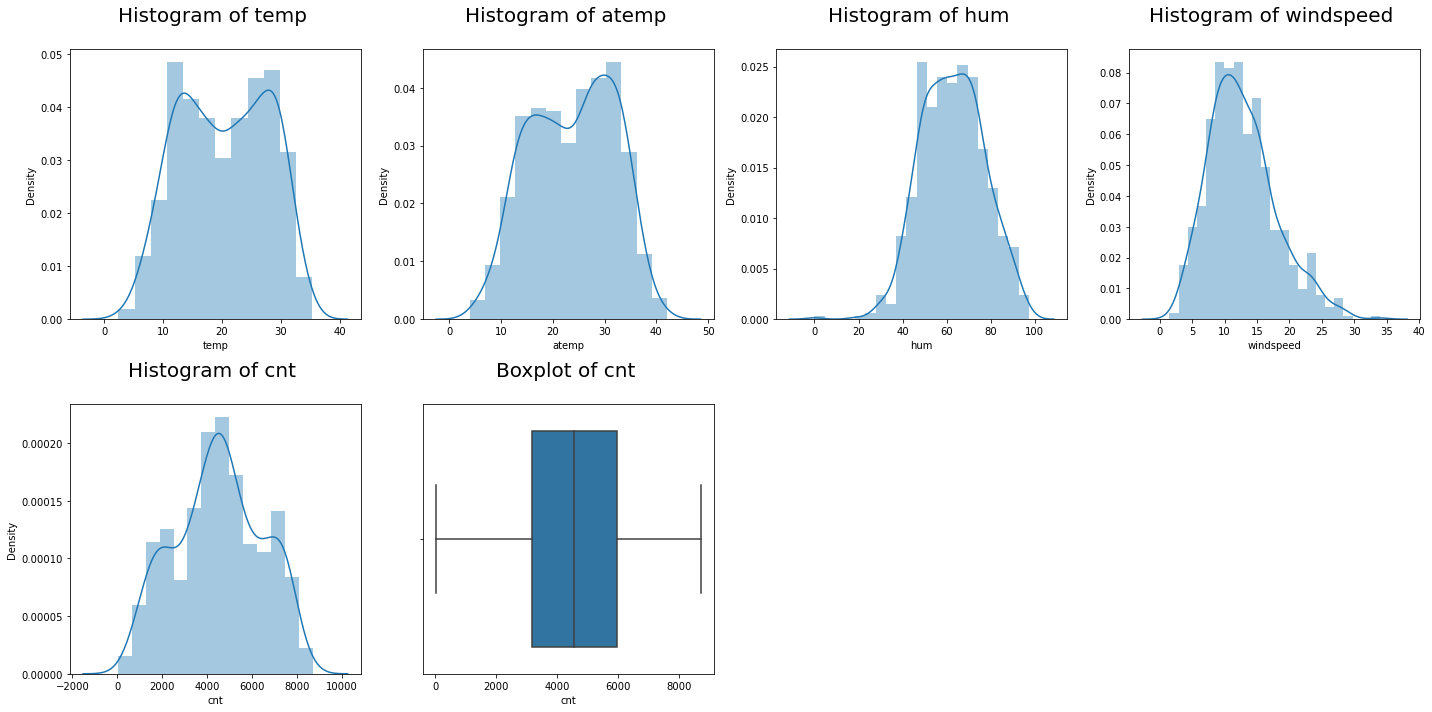

In [533]:
#For Continuous variable,distplot is used to see the distribution of data.

plt.figure(figsize=(20,10)) # The figure size

plt.subplot(2,4,1)
plt.title("Histogram of temp \n",fontsize=20) # The title of the plot
sns.distplot(df["temp"])

plt.subplot(2,4,2)
plt.title("Histogram of atemp \n",fontsize=20) # The title of the plot
sns.distplot(df["atemp"])

plt.subplot(2,4,3)
plt.title("Histogram of hum \n",fontsize=20) # The title of the plot
sns.distplot(df["hum"])

plt.subplot(2,4,4)
plt.title("Histogram of windspeed \n",fontsize=20) # The title of the plot
sns.distplot(df["windspeed"])

plt.subplot(2,4,5)
plt.title("Histogram of cnt \n",fontsize=20) # The title of the plot
sns.distplot(df["cnt"])

plt.subplot(2,4,6)
plt.title("Boxplot of cnt \n",fontsize=20) # The title of the plot
sns.boxplot(df["cnt"])

plt.tight_layout() # To avoid overlapping layout
plt.show() # To display the plot



### Observations:

    1.temp and atemp - Most of the days has temperature and feeling temperature between 15 to 30 degree Celsius.
    2.hum - The humidity value varies between 50 to 70 for most of the days.
    3.windspeed - The windspeed varies between 10 to 15 for most of the days.
    4.cnt - The count of total bikes rented varies between 3500 to 6000.

### Bivariate Analysis

#### In the given dataset, target variable is "cnt" (Count of total bikes rented") and will be compared with other variables.

<Figure size 1440x720 with 0 Axes>

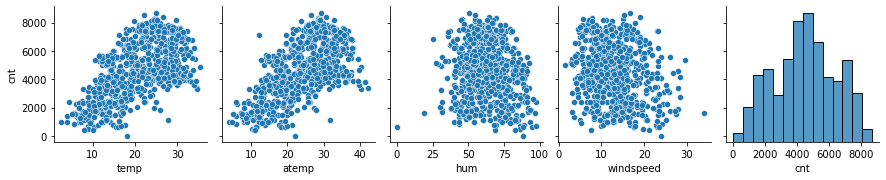

In [534]:
##Analysing numerical(continuous) variables with respect to target variable "cnt"

plt.figure(figsize=(20,10))
sns.pairplot(data=df,x_vars=["temp","atemp","hum","windspeed","cnt"],y_vars="cnt")
plt.show()


### Observations:
    temp and atemp - Has highest positive correlation with target variable cnt.
    

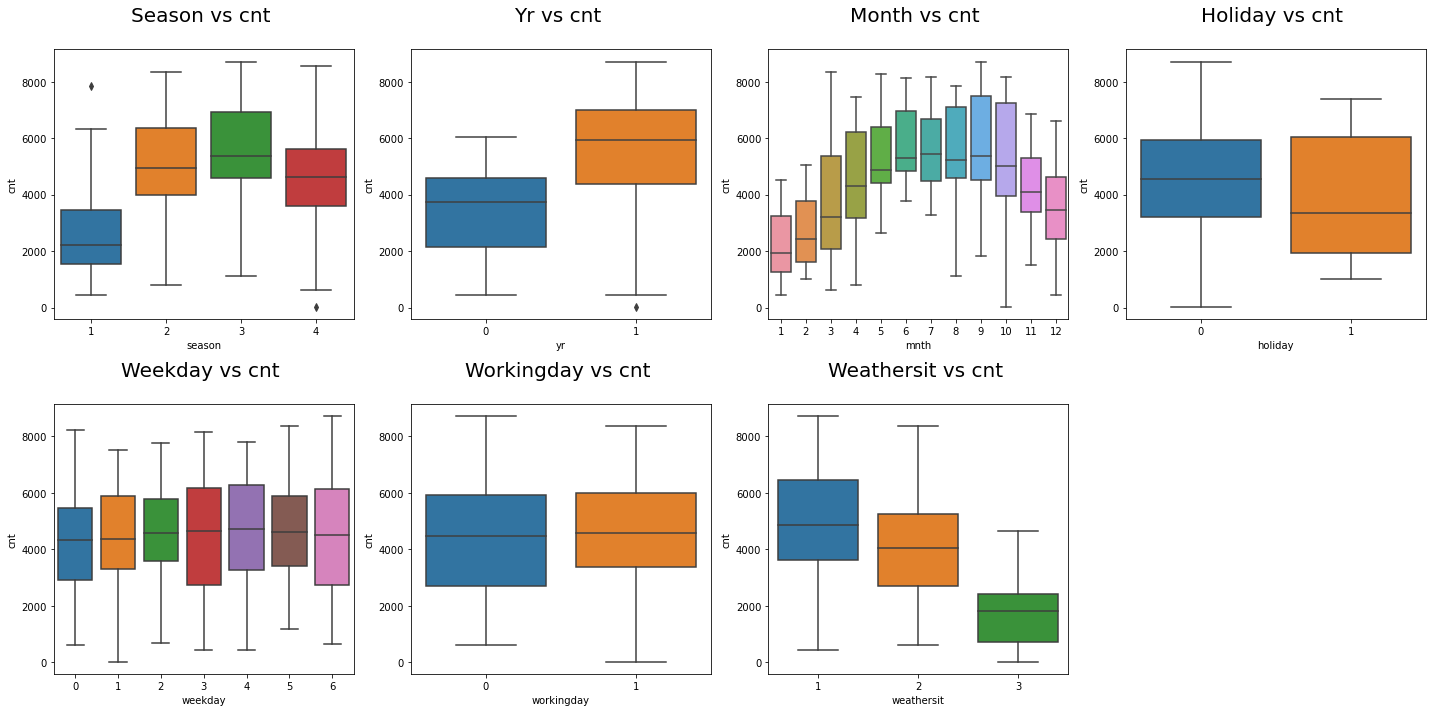

In [535]:
##Analysing categorical variables with respect to target variable "cnt"

plt.figure(figsize=(20,10)) # The figure size

plt.subplot(2,4,1)
plt.title("Season vs cnt \n",fontsize=20) # The title of the plot
sns.boxplot(data=df,x="season",y="cnt")

plt.subplot(2,4,2)
plt.title("Yr vs cnt \n",fontsize=20) # The title of the plot
sns.boxplot(data=df,x="yr",y="cnt")

plt.subplot(2,4,3)
plt.title("Month vs cnt \n",fontsize=20) # The title of the plot
sns.boxplot(data=df,x="mnth",y="cnt")

plt.subplot(2,4,4)
plt.title("Holiday vs cnt \n",fontsize=20) # The title of the plot
sns.boxplot(data=df,x="holiday",y="cnt")

plt.subplot(2,4,5)
plt.title("Weekday vs cnt \n",fontsize=20) # The title of the plot
sns.boxplot(data=df,x="weekday",y="cnt")

plt.subplot(2,4,6)
plt.title("Workingday vs cnt \n",fontsize=20) # The title of the plot
sns.boxplot(data=df,x="workingday",y="cnt")

plt.subplot(2,4,7)
plt.title("Weathersit vs cnt \n",fontsize=20) # The title of the plot
sns.boxplot(data=df,x="weathersit",y="cnt")

plt.tight_layout() # To avoid overlapping layout
plt.show() # To display the plot

### Observations:
    1.Season vs cnt - Number of bikes rented is maximum in the season 3-"Fall" and low during season 1-"Spring".
    2.Yr vs cnt - The demand bike increased in the year 2019 when compared with year 2018.
    3.Month vs cnt - There is a gradual increase in the bikes rented across the month and decreases at the last few months.
    4.Holiday vs cnt - Bike demand is less in holidays in comparison to not being holiday.
    5.Weekday vs cnt - Weekdays and the count of bikes rented do not show much difference in variation.
    6.Workingday vs cnt - Workingday or not, the bikes rented do not show much significant change.
    7.Weathersit vs cnt - The number of bikes rented are high during the weathersit 1 and low in weathersit 3.And no data for weathersit-4.

## Multivariate Analysis

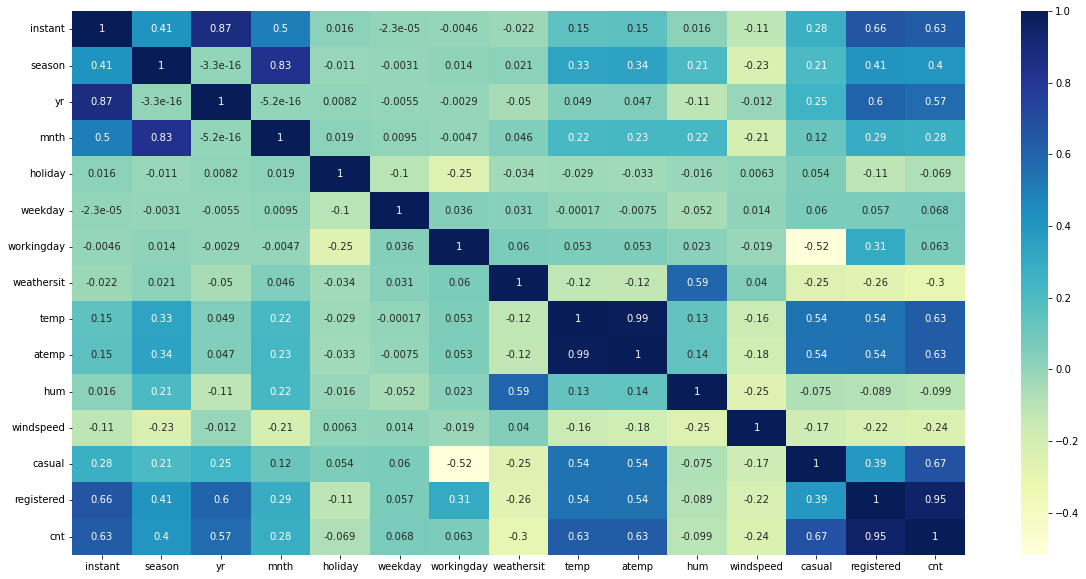

In [536]:
plt.figure(figsize=(20,10)) # To set figure size
sns.heatmap(data=df.corr(),annot=True,cmap="YlGnBu") # To see the correlation between all variables in the dataset
plt.show() #To plot

### Observation: 
1.A positive correalation observed between cnt and temp (0.63)

2.A Negative correlation observed for cnt with hum and windspeed (-0.099 and -0.24)

# Data Preparation for Modeling

### Dropping 4 columns from the given dataset:
    1. "instant" - Since instant is a record index, it is not usefull in predicting the target variable.
    2. "dteday" - We will be weekday which is derived from this column. Hence, This column will be dropped.
    3. "casual" and "registered" - Since the target variable "cnt" is summed up as a count of total rental bikes including both      casual and registered, dropping these 2 columns.
    4."atemp" - temp and atemp are directly correlated (0.99) with each other. Hence, atemp can be dropped.

In [537]:
##Dropping the columns

df=df.drop(["instant","dteday","casual","registered","atemp"],axis="columns")

In [538]:
#Checking the df size
 
df.shape

(730, 11)

### Dummy Encoding:
    This is performed for variables having more number of categories(k) in the variables, and dummy encoding uses k-1 dummy variables.

In [539]:

cols=["season","weathersit","weekday","mnth"] # Columns for which dummy variables needs to be created

df[cols]=df[cols].astype("category") # changing their datatype to "category"

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [541]:
df=pd.get_dummies(df,drop_first=True) # dummy variables gets created

In [542]:
df.shape # Checking the dataset size

(730, 29)

In [543]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [544]:
#To check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

### Train_test Split :
This is done to evaluate model on unseen data to increase the generalizing capability of the model.

In [545]:

df_train,df_test=train_test_split(df,train_size=0.7,random_state=100) # Taking 70% of the total dataset as training sets and remaining as test set.

print(df_train.shape)
print(df_test.shape)



(510, 29)
(220, 29)


### Rescaling:
Scaling is done to avoid bias since variables at different scales do not contribute equally to the model fitting.Thus, we are uing MinMax scaling. This will shrinks the data within the given range, usually of 0 to 1. 

We will be using Normalised scaling in both train and test sets, which will treat the outliers too.

In [546]:
#Instantiate an object
scaler=MinMaxScaler()

#create a list of numeric vars
num_vars=["temp","hum","windspeed","cnt"]

#fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [547]:
## Checking its min and max value is between 0 and 1 to make sure scaling is done.

df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


# Training the Model

In [548]:

y_train=df_train.pop("cnt") #Target variable "cnt" is assigned to y_train
X_train=df_train # The rest of the independent variables are assigned to X_train

### Let's create a model for Automated variable selection using RFE (Recursive Feature Elimination) :
 RFE is effective at selecting the features in a training dataset that are most relevant in predicting the target variable.

In [549]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [602]:
#Fit the model
lm=LinearRegression()

# fit model
lm.fit(X_train, y_train)

#Running RFE to select 15 number of varibles
rfe=RFE(lm, n_features_to_select=15)

rfe=rfe.fit(X_train,y_train)

In [603]:
#View the support_ and rank_
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 7),
 ('mnth_4', False, 10),
 ('mnth_5', False, 8),
 ('mnth_6', False, 9),
 ('mnth_7', False, 12),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [604]:
#Creating a list of top 15 features selected by RFE (rfe.support_ == True)
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [605]:
#Checking the remaining columns which are not selected by RFE (rfe.support_ == False)

X_train.columns[~rfe.support_]

Index(['season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [606]:
##Building model using Statsmodel for a detailed statistics

X_train_rfe=X_train[col]

In [607]:
#Adding constant variable

X_train_rfe=sm.add_constant(X_train_rfe)

In [556]:
#Running the linear model

lm=sm.OLS(y_train,X_train_rfe).fit()

In [557]:
##Summary of the linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.91e-181
Time:                        21:51:06   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543      0.000       0.204       0.310
yr               0.2269      0.008     27.028      0.000       0.210       0.243
holiday         -0.0674      0.024     -2.829      0.005      -0.114      -0.021
workingday       0.0234      0.008      2.927      0.004       0.008       0.039
temp             0.5921      0.020     29.378      0.000       0.552       0.632
hum             -0.2779      0.032     -8.735      0.000      -0.340      -0.215
windspeed       -0.2014      0.026     -7.666      0.000      -0.253      -0.150
season_2         0.0891      0.010      8.501      0.000       0.069       0.110
season_4         0.1446      0.011     13.493      0.000       0.124       0.166
mnth_9           0.1042      0.016      6.482      0.000       0.073       0.136
weekday_1       -0.0170      0.010     -1.704      0.089      -0.037       0.003
weekday_2       -0.0158      0.011     -1.375      0.170      -0.038       0.007
weekday_3       -0.0033      0.011     -0.311      0.756      -0.025       0.018
weekday_4       -0.0060      0.011     -0.539      0.590      -0.028       0.016
weekday_5       -0.0018      0.011     -0.160      0.873      -0.024       0.021
weathersit_3    -0.1967      0.026     -7.593      0.000      -0.248      -0.146
==============================================================================
Omnibus:                       57.957   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.885
Skew:                          -0.681   Prob(JB):                     2.27e-24
Kurtosis:                       4.809   Cond. No.                     1.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [559]:
##Since weekday_5 has high P value,It is not significant, lets drop it.

X_train_rfe=X_train_rfe.drop("weekday_5",axis=1)

### Let's build another model to check for VIF value and P value to drop further more variables.

1.VIF-Variance Inflation Factor : It is used to detect the severity of multicollinearity and VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem.

2.P value :  Explains the significance of the variable.If the p-value is 0.05 or lower, the variables are significant, but if it is higher than 0.05, the result is non-significant and can be removed from the model.

In [561]:

vif=pd.DataFrame()

vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif["VIF"]=round(vif["VIF"],2)
vif


,Features,VIF
0,const,42.45
3,workingday,2.47
10,weekday_1,1.94
12,weekday_3,1.91
13,weekday_4,1.79
11,weekday_2,1.77
2,holiday,1.35
5,hum,1.26
8,season_4,1.25
4,temp,1.21


In [562]:
##VIF value tend to be less than 5 for all the independent variables,Hence deciding "dropping of variables" based on P value.

In [563]:
#Build the model

#Add Constant
X_train_sm=sm.add_constant(X_train_rfe)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#print the summary
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.91e-181
Time:                        21:52:58   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543      0.000       0.204       0.310
yr               0.2269      0.008     27.028      0.000       0.210       0.243
holiday         -0.0692      0.030     -2.271      0.024      -0.129      -0.009
workingday       0.0216      0.014      1.551      0.121      -0.006       0.049
temp             0.5921      0.020     29.378      0.000       0.552       0.632
hum             -0.2779      0.032     -8.735      0.000      -0.340      -0.215
windspeed       -0.2014      0.026     -7.666      0.000      -0.253      -0.150
season_2         0.0891      0.010      8.501      0.000       0.069       0.110
season_4         0.1446      0.011     13.493      0.000       0.124       0.166
mnth_9           0.1042      0.016      6.482      0.000       0.073       0.136
weekday_1       -0.0152      0.016     -0.943      0.346      -0.047       0.016
weekday_2       -0.0139      0.016     -0.856      0.392      -0.046       0.018
weekday_3       -0.0015      0.016     -0.097      0.923      -0.032       0.029
weekday_4       -0.0042      0.016     -0.257      0.798      -0.036       0.028
weathersit_3    -0.1967      0.026     -7.593      0.000      -0.248      -0.146
==============================================================================
Omnibus:                       57.957   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.885
Skew:                          -0.681   Prob(JB):                     2.27e-24
Kurtosis:                       4.809   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [564]:
#Dropping "weekday_3" since it has high P value of 0.923 resulting insignificant.

X_train_sm=X_train_sm.drop("weekday_3",axis=1)


In [565]:
#Build the model again to check for P value.

#Add Constant
X_train_sm=sm.add_constant(X_train_sm)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#print the summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.52e-182
Time:                        21:53:00   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     496   BIC:                            -898.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2573      0.027      9.555      0.000       0.204       0.310
yr               0.2269      0.008     27.056      0.000       0.210       0.243
holiday         -0.0700      0.029     -2.383      0.018      -0.128      -0.012
workingday       0.0207      0.011      1.908      0.057      -0.001       0.042
temp             0.5921      0.020     29.407      0.000       0.553       0.632
hum             -0.2780      0.032     -8.745      0.000      -0.340      -0.216
windspeed       -0.2014      0.026     -7.673      0.000      -0.253      -0.150
season_2         0.0891      0.010      8.514      0.000       0.069       0.110
season_4         0.1446      0.011     13.506      0.000       0.124       0.166
mnth_9           0.1042      0.016      6.488      0.000       0.073       0.136
weekday_1       -0.0144      0.014     -1.056      0.292      -0.041       0.012
weekday_2       -0.0131      0.014     -0.950      0.342      -0.040       0.014
weekday_4       -0.0033      0.014     -0.243      0.808      -0.030       0.024
weathersit_3    -0.1969      0.026     -7.641      0.000      -0.248      -0.146
==============================================================================
Omnibus:                       57.830   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.623
Skew:                          -0.679   Prob(JB):                     2.59e-24
Kurtosis:                       4.807   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [566]:
#Dropping "weekday_4" since it has high P value of 0.808 resulting insignificant.

X_train_sm=X_train_sm.drop("weekday_4",axis=1)

In [567]:
#Build the model again to check for P value.

#Add Constant
X_train_sm=sm.add_constant(X_train_sm)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#print the summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.48e-183
Time:                        21:53:05   Log-Likelihood:                 492.87
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     497   BIC:                            -904.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2570      0.027      9.561      0.000       0.204       0.310
yr               0.2269      0.008     27.082      0.000       0.210       0.243
holiday         -0.0713      0.029     -2.474      0.014      -0.128      -0.015
workingday       0.0197      0.010      1.978      0.048       0.000       0.039
temp             0.5921      0.020     29.436      0.000       0.553       0.632
hum             -0.2776      0.032     -8.752      0.000      -0.340      -0.215
windspeed       -0.2014      0.026     -7.680      0.000      -0.253      -0.150
season_2         0.0891      0.010      8.526      0.000       0.069       0.110
season_4         0.1446      0.011     13.517      0.000       0.124       0.166
mnth_9           0.1041      0.016      6.491      0.000       0.073       0.136
weekday_1       -0.0133      0.013     -1.034      0.301      -0.039       0.012
weekday_2       -0.0121      0.013     -0.922      0.357      -0.038       0.014
weathersit_3    -0.1971      0.026     -7.658      0.000      -0.248      -0.147
==============================================================================
Omnibus:                       57.905   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.717
Skew:                          -0.680   Prob(JB):                     2.47e-24
Kurtosis:                       4.807   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [568]:
#Dropping "weekday_2" since it has high P value of 0.357 resulting insignificant.

X_train_sm=X_train_sm.drop("weekday_2",axis=1)

In [569]:
#Build the model again to check for P value.

#Add Constant
X_train_sm=sm.add_constant(X_train_sm)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#print the summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.48e-184
Time:                        21:53:28   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     498   BIC:                            -910.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.601      0.000       0.205       0.311
yr               0.2269      0.008     27.086      0.000       0.210       0.243
holiday         -0.0735      0.029     -2.560      0.011      -0.130      -0.017
workingday       0.0168      0.009      1.778      0.076      -0.002       0.035
temp             0.5916      0.020     29.426      0.000       0.552       0.631
hum             -0.2782      0.032     -8.774      0.000      -0.340      -0.216
windspeed       -0.2019      0.026     -7.701      0.000      -0.253      -0.150
season_2         0.0890      0.010      8.512      0.000       0.068       0.109
season_4         0.1444      0.011     13.504      0.000       0.123       0.165
mnth_9           0.1044      0.016      6.514      0.000       0.073       0.136
weekday_1       -0.0105      0.012     -0.840      0.401      -0.035       0.014
weathersit_3    -0.1960      0.026     -7.624      0.000      -0.246      -0.145
==============================================================================
Omnibus:                       57.412   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.902
Skew:                          -0.672   Prob(JB):                     2.25e-24
Kurtosis:                       4.822   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [570]:
#Dropping "weekday_1" since it has high P value of 0.401 resulting insignificant.

X_train_sm=X_train_sm.drop("weekday_1",axis=1)

In [571]:
#Build the model again to check for P value.

#Add Constant
X_train_sm=sm.add_constant(X_train_sm)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#print the summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.19e-185
Time:                        21:56:09   Log-Likelihood:                 492.07
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2585      0.027      9.632      0.000       0.206       0.311
yr               0.2265      0.008     27.093      0.000       0.210       0.243
holiday         -0.0816      0.027     -3.015      0.003      -0.135      -0.028
workingday       0.0147      0.009      1.617      0.107      -0.003       0.033
temp             0.5921      0.020     29.472      0.000       0.553       0.632
hum             -0.2791      0.032     -8.810      0.000      -0.341      -0.217
windspeed       -0.2019      0.026     -7.706      0.000      -0.253      -0.150
season_2         0.0888      0.010      8.500      0.000       0.068       0.109
season_4         0.1441      0.011     13.488      0.000       0.123       0.165
mnth_9           0.1047      0.016      6.532      0.000       0.073       0.136
weathersit_3    -0.1957      0.026     -7.615      0.000      -0.246      -0.145
==============================================================================
Omnibus:                       56.679   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.979
Skew:                          -0.663   Prob(JB):                     3.57e-24
Kurtosis:                       4.824   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [572]:
#Dropping "workingday" since it has high P value of 0.107 resulting insignificant.

X_train_sm=X_train_sm.drop("workingday",axis=1)

In [573]:
#Build the model again to check for P value.

#Add Constant
X_train_sm=sm.add_constant(X_train_sm)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#print the summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.74e-186
Time:                        21:56:18   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.234      0.000       0.217       0.320
yr               0.2268      0.008     27.103      0.000       0.210       0.243
holiday         -0.0915      0.026     -3.467      0.001      -0.143      -0.040
temp             0.5928      0.020     29.471      0.000       0.553       0.632
hum             -0.2784      0.032     -8.776      0.000      -0.341      -0.216
windspeed       -0.2034      0.026     -7.755      0.000      -0.255      -0.152
season_2         0.0892      0.010      8.523      0.000       0.069       0.110
season_4         0.1434      0.011     13.413      0.000       0.122       0.164
mnth_9           0.1052      0.016      6.554      0.000       0.074       0.137
weathersit_3    -0.1948      0.026     -7.570      0.000      -0.245      -0.144
==============================================================================
Omnibus:                       60.303   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.427
Skew:                          -0.717   Prob(JB):                     1.73e-24
Kurtosis:                       4.759   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [574]:
##Checking VIF value once agian 

vif=pd.DataFrame()

vif["Features"]=X_train_sm.columns
vif["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif["VIF"]=round(vif["VIF"],2)
vif


,Features,VIF
0,const,40.19
4,hum,1.25
7,season_4,1.24
3,temp,1.21
6,season_2,1.19
5,windspeed,1.16
8,mnth_9,1.11
9,weathersit_3,1.11
1,yr,1.02
2,holiday,1.01


### Now we got all variable which is significant to build the model ( P value less than 0.005 and VIF value less than 5)

In [477]:
#X_train_new=X_train_sm.drop(["const"],axis=1) # Since const is the intercept and in general we dont report at it.

In [580]:
# list down and check variables of final model
var_final = list(lr_model.params.index)

var_final.remove('const')

print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lr_model.params,3))


Final Selected Variables: ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_9', 'weathersit_3']

Coefficent for the variables are:
const           0.268
yr              0.227
holiday        -0.092
temp            0.593
hum            -0.278
windspeed      -0.203
season_2        0.089
season_4        0.143
mnth_9          0.105
weathersit_3   -0.195
dtype: float64


# Residual Analysis

In [581]:
#y_train_pred calculation

y_train_pred = lr_model.predict(X_train_sm)

In [582]:
#Calculating the residual value

res=y_train - y_train_pred

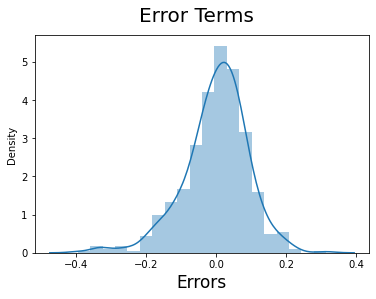

In [583]:
##Lets see the distribution of error terms,to make sure the assumptions are satisifed (it is centered at mean 0 and follows a normal distribution).

fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle("Error Terms",fontsize = 20) # plot heading
plt.xlabel("Errors",fontsize = 17)  # x-label
plt.show()

### Hence, assumptions are verified. Error terms are normally distributed and centered at zero

# Predictions and Evaluating on the test set

### Rescaling on the test set

In [584]:
#create a list of numeric vars
num_vars=["temp","hum","windspeed","cnt"]

#fit on data
df_test[num_vars]=scaler.transform(df_test[num_vars]) # We only transform set in test data and perform fit_transform in train data.

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [585]:
# Checking its min and max value to make sure scaling is done. But resultant min and max value will not be exactly between 0 and 1,since we did fit only in the training set and not in test set.
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [586]:
y_test=df_test.pop("cnt") # Target variable "cnt" is assigned to y_test
X_test=df_test  #Remaining independent variables are assigned to the X_test

In [587]:
#Now, let's make predictions using our model

X_test_new=X_test[X_train_new.columns] # Creating X_test_new dataframe by dropping variables from X_test

In [588]:
# Adding a constant variable

X_test_sm=sm.add_constant(X_test_new)

In [589]:
#Making predictions

y_test_pred=lr_model.predict(X_test_sm)

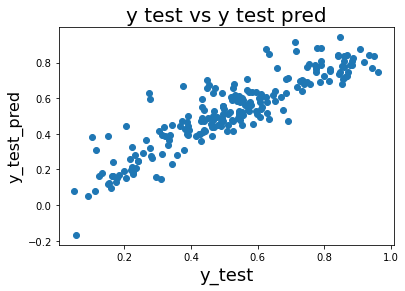

In [590]:
#plotting the y_test and y_test_pred to understand the spread

plt.scatter(y_test,y_test_pred)
plt.title("y test vs y test pred",fontsize=20) # plot heading
plt.xlabel("y_test",fontsize=18)  # x-label
plt.ylabel("y_test_pred",fontsize=16)  # y-label
plt.show()

### Model performance is very much similar

In [591]:
#Evaluting the r2 score of the test set

r2_score(y_true=y_test,y_pred=y_test_pred)

0.803600251161443

In [592]:
#Evaluting the r2 score of the training set
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8299918316401657

## r2 score: 
This is used to evaluate the performance of a linear regression model. It is the amount of the variation in the dependent variable which is predictable from the independent variables.And the value lies between 0 to 1. In general,the higher the r-squared, the better the model fits the data.



# Conclusion:
We have finalised the independent variables which are significant in predicting the demand for shared bikes. And evaluated how well those variables describe the bike demands.


### Since r2 score in train and test sets are very similar and significantly high.We can conclude that, what the model has learnt in the Training set is also able to generalize well on the Test set.
From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
So it recomended to give these variables utmost importance while planning to achieve maximum demand.

## Based on final model top three features contributing significantly towards explaining the demand are:
    1.Temperature
    2.Year
    3.Humidity

So it recomended to give these variables utmost importance while planning to achieve maximum demand.